In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
athlete=pd.read_excel("Athletes.xlsx",engine="openpyxl")

In [3]:
athlete.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


<h3>How many athletes participated in Olympic 2021?</h3><br>

In [4]:
athlete["Name"].unique().size

11062

<h3>How many countries participated in Olympic 2021?</h3><br>

In [5]:
athlete["NOC"].unique().size

206

<h3>Different number of sports in Tokyo Olympics?</h3><br>

In [6]:
athlete["Discipline"].unique().size

46

<h3>How many athletes from each country?</h3><br>

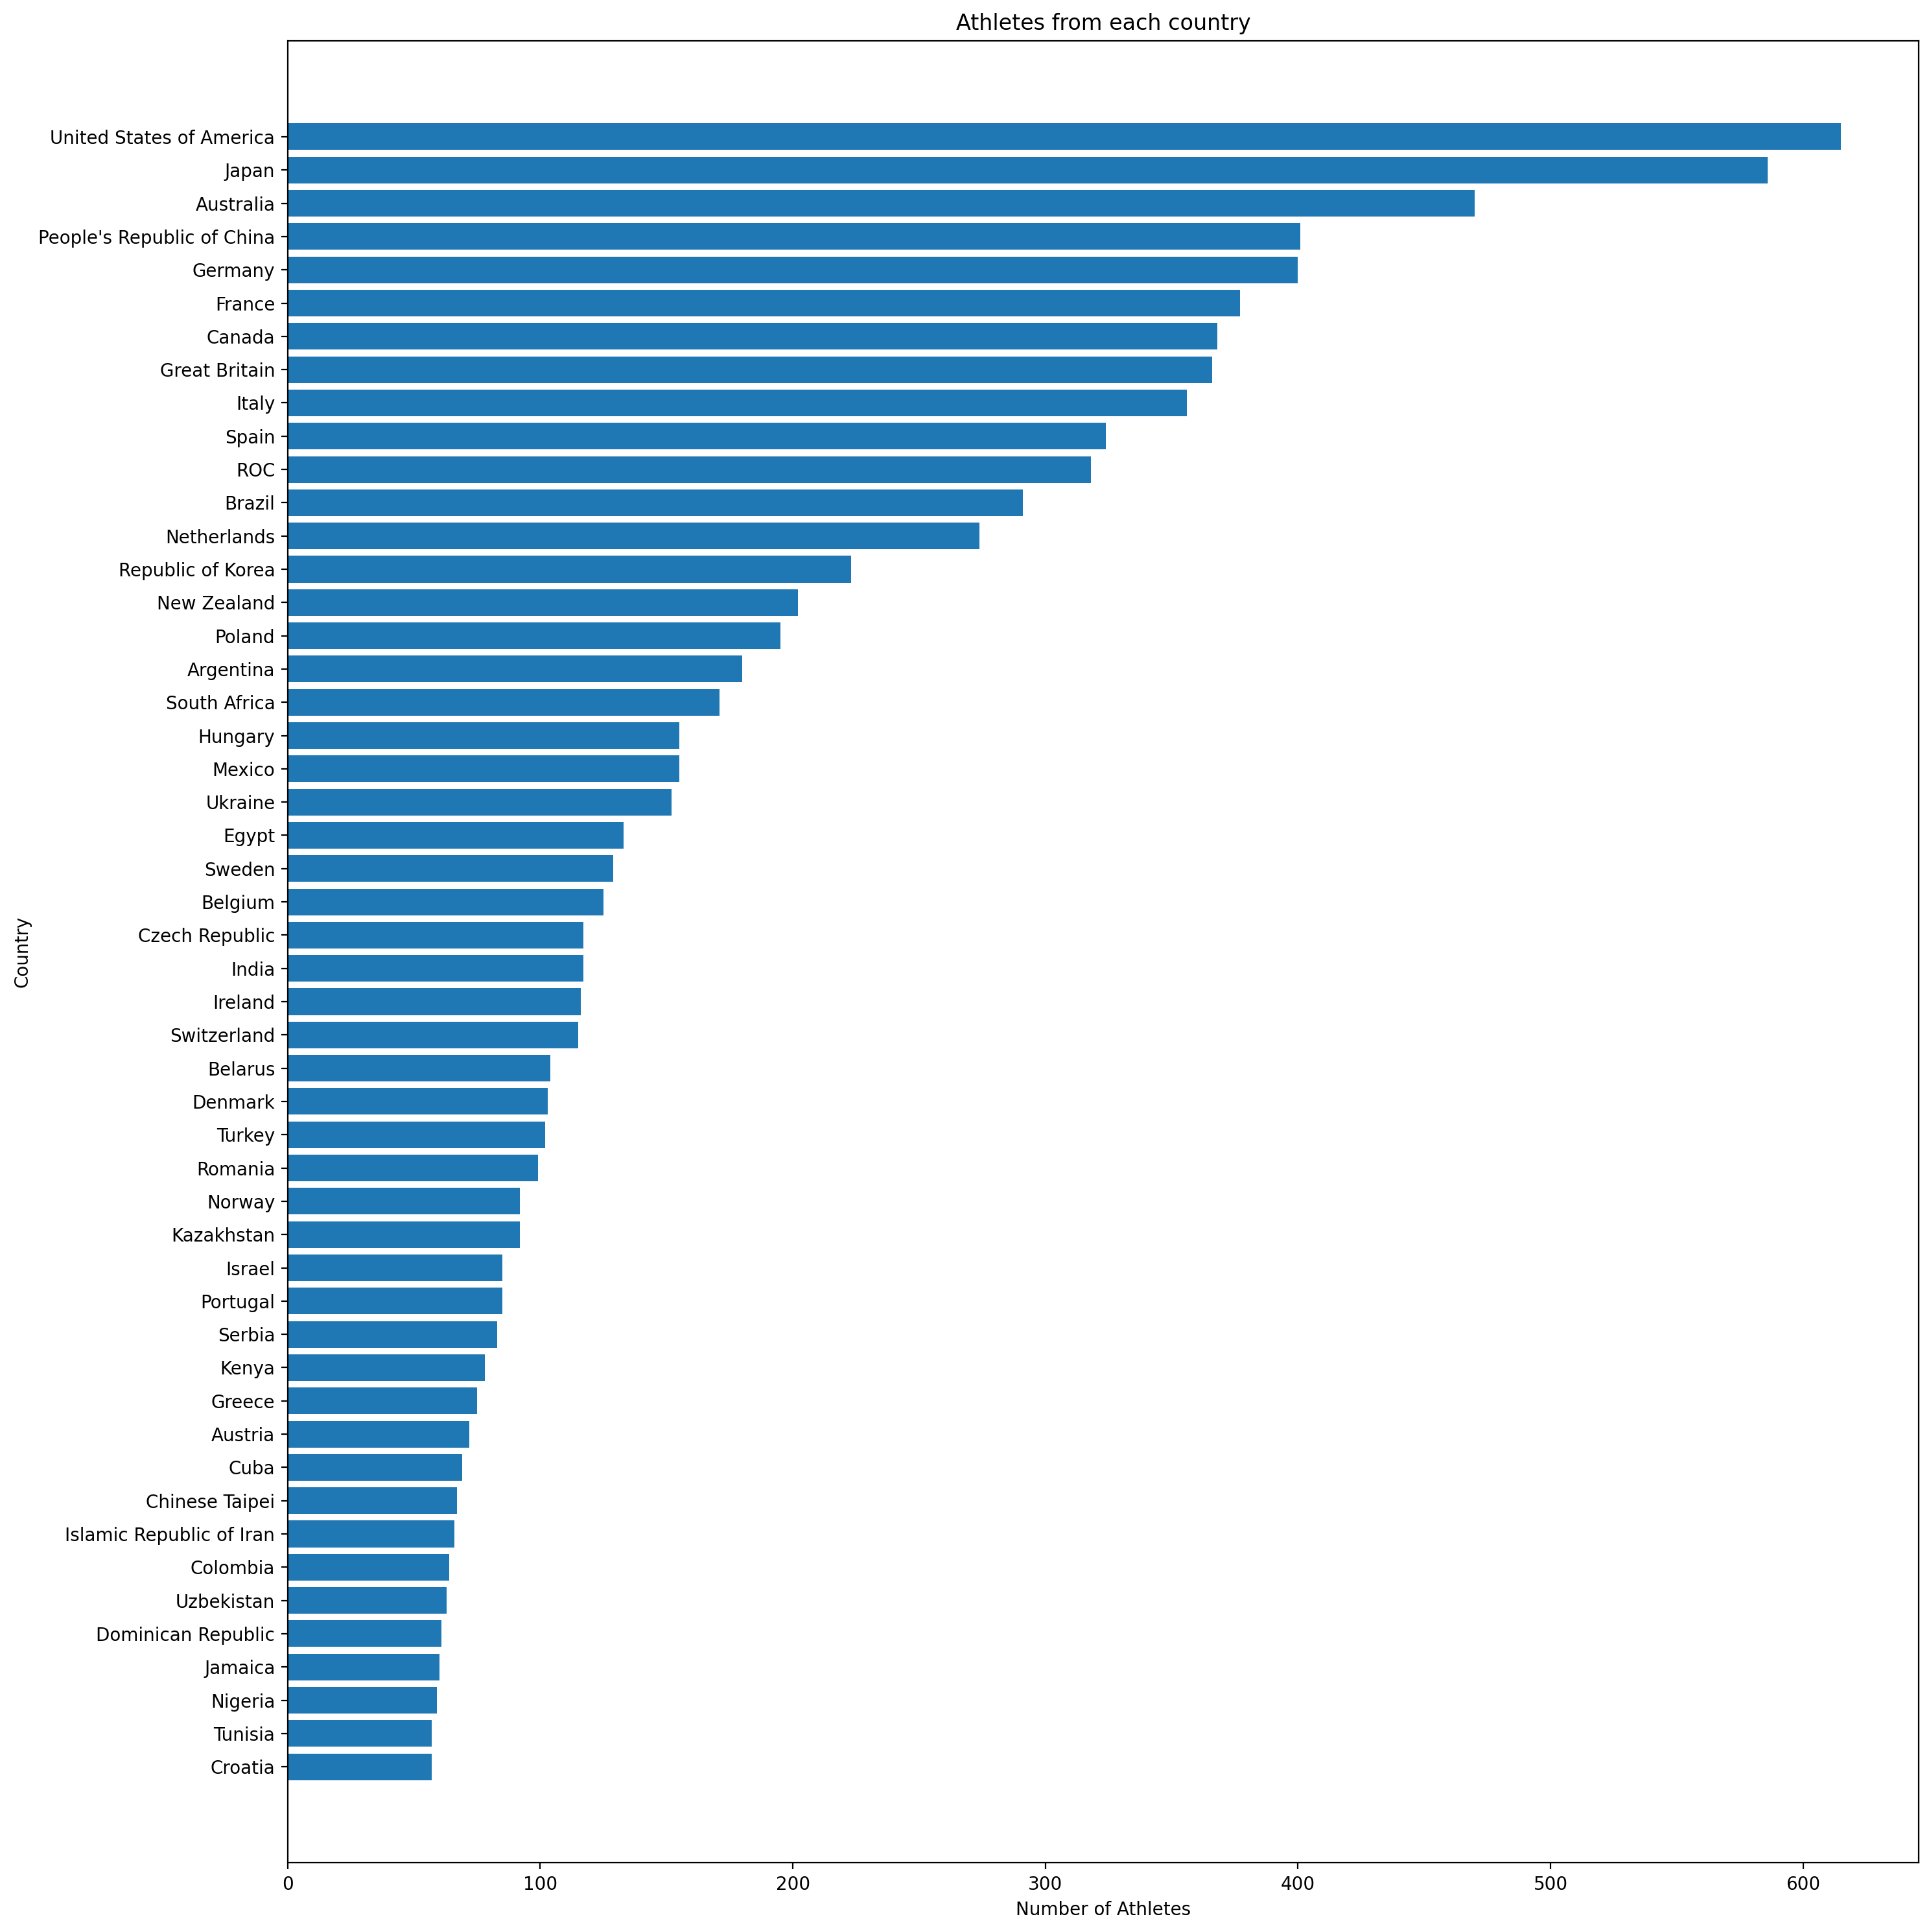

In [7]:
num=athlete.groupby(by="NOC").count()["Name"].sort_values()
%matplotlib inline
plt.style.use("fast")
plt.figure(figsize=(15,15),dpi=200)
plt.barh(num.tail(50).index,num.tail(50))
plt.xlabel("Number of Athletes")
plt.ylabel("Country")
plt.title("Athletes from each country")
plt.tight_layout()
plt.show()

<h3>Rank of India in Tokyo Olympics on the basis of paricipation</h3><br>

In [8]:
num=athlete.groupby(by="NOC").count()["Name"]
Ranks=num.rank(ascending=False)
int(Ranks.loc["India"])

25

<h3>10 Most paricipated Disciplines</h3><br>

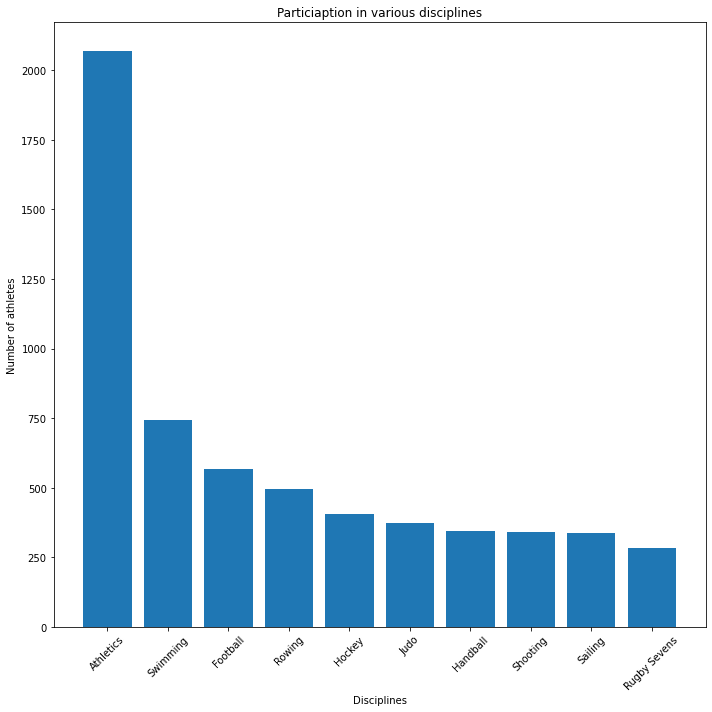

In [9]:
dis=athlete["Discipline"].value_counts()
plt.style.use("fast")
plt.figure(figsize=(10,10))
plt.bar(np.arange(10),dis.head(10))
plt.xticks(np.arange(10),dis.head(10).index,rotation=45)
plt.xlabel("Disciplines")
plt.ylabel("Number of athletes")
plt.title("Particiaption in various disciplines")
plt.tight_layout()
plt.show()

<h3>Athletes of India in different disciplines</h3><br>

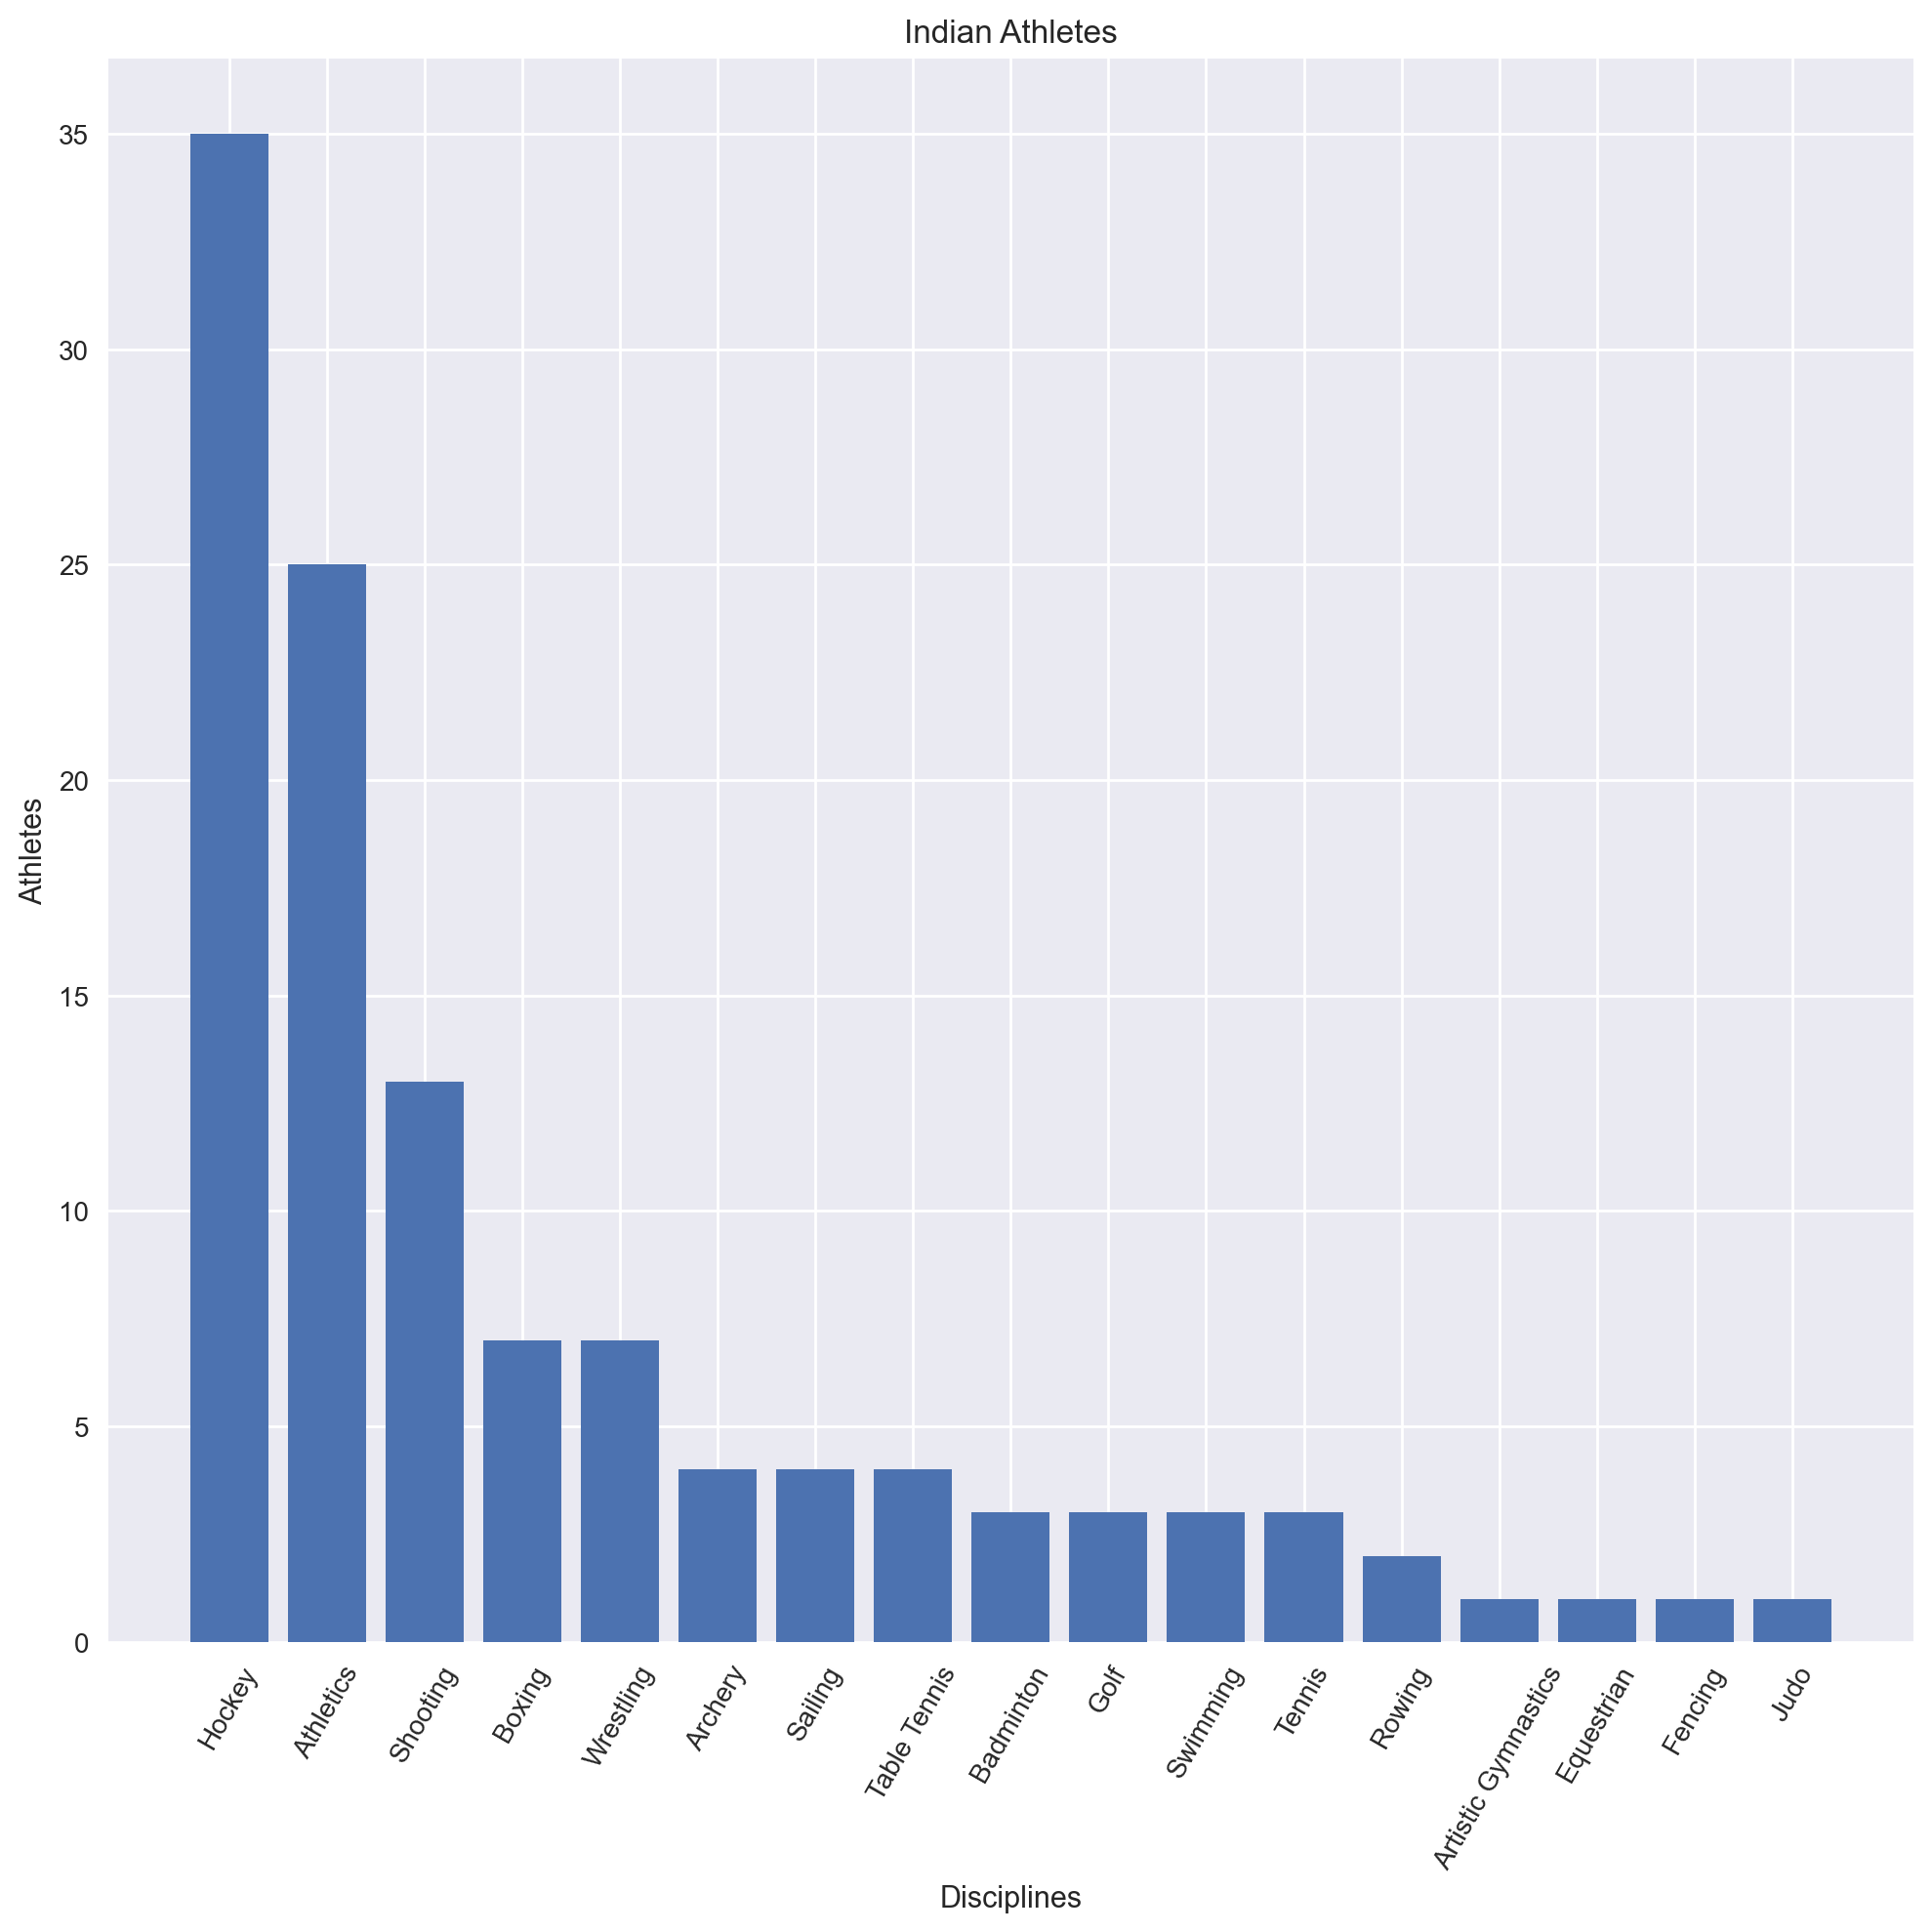

In [22]:
c_grp=athlete.groupby(by="NOC")["Discipline"]
num_part=len(c_grp.value_counts().loc["India"])
plt.style.use('seaborn')
plt.figure(figsize=(10,10),dpi=200)
plt.bar(np.arange(num_part),c_grp.value_counts().loc["India"])
plt.xticks(np.arange(num_part),c_grp.value_counts().loc["India"].index,rotation=60)
plt.xlabel("Disciplines")
plt.ylabel("Athletes")
plt.title("Indian Athletes")
plt.tight_layout()
plt.show()

<h3>Top 10 Teams in the medals table</h3><br>

In [79]:
medal=pd.read_excel("Medals.xlsx",engine="openpyxl",index_col="Team/NOC")
medal.drop(["Rank"],axis=1,inplace=True)
medal.sort_values(by="Rank by Total").head(10)

c:\users\vansh\appdata\local\programs\python\python36\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Gold,Silver,Bronze,Total,Rank by Total
Team/NOC,,,,,
United States of America,39,41,33,113,1
People's Republic of China,38,32,18,88,2
ROC,20,28,23,71,3
Great Britain,22,21,22,65,4
Japan,27,14,17,58,5
Australia,17,7,22,46,6
Italy,10,10,20,40,7
Germany,10,11,16,37,8
Netherlands,10,12,14,36,9


<h3>Rank of India in the medals table</h3><br>

In [80]:
medal.loc["India","Rank by Total"]

33

<h3>Top 10 teams to win Most Gold medals</h3><br>

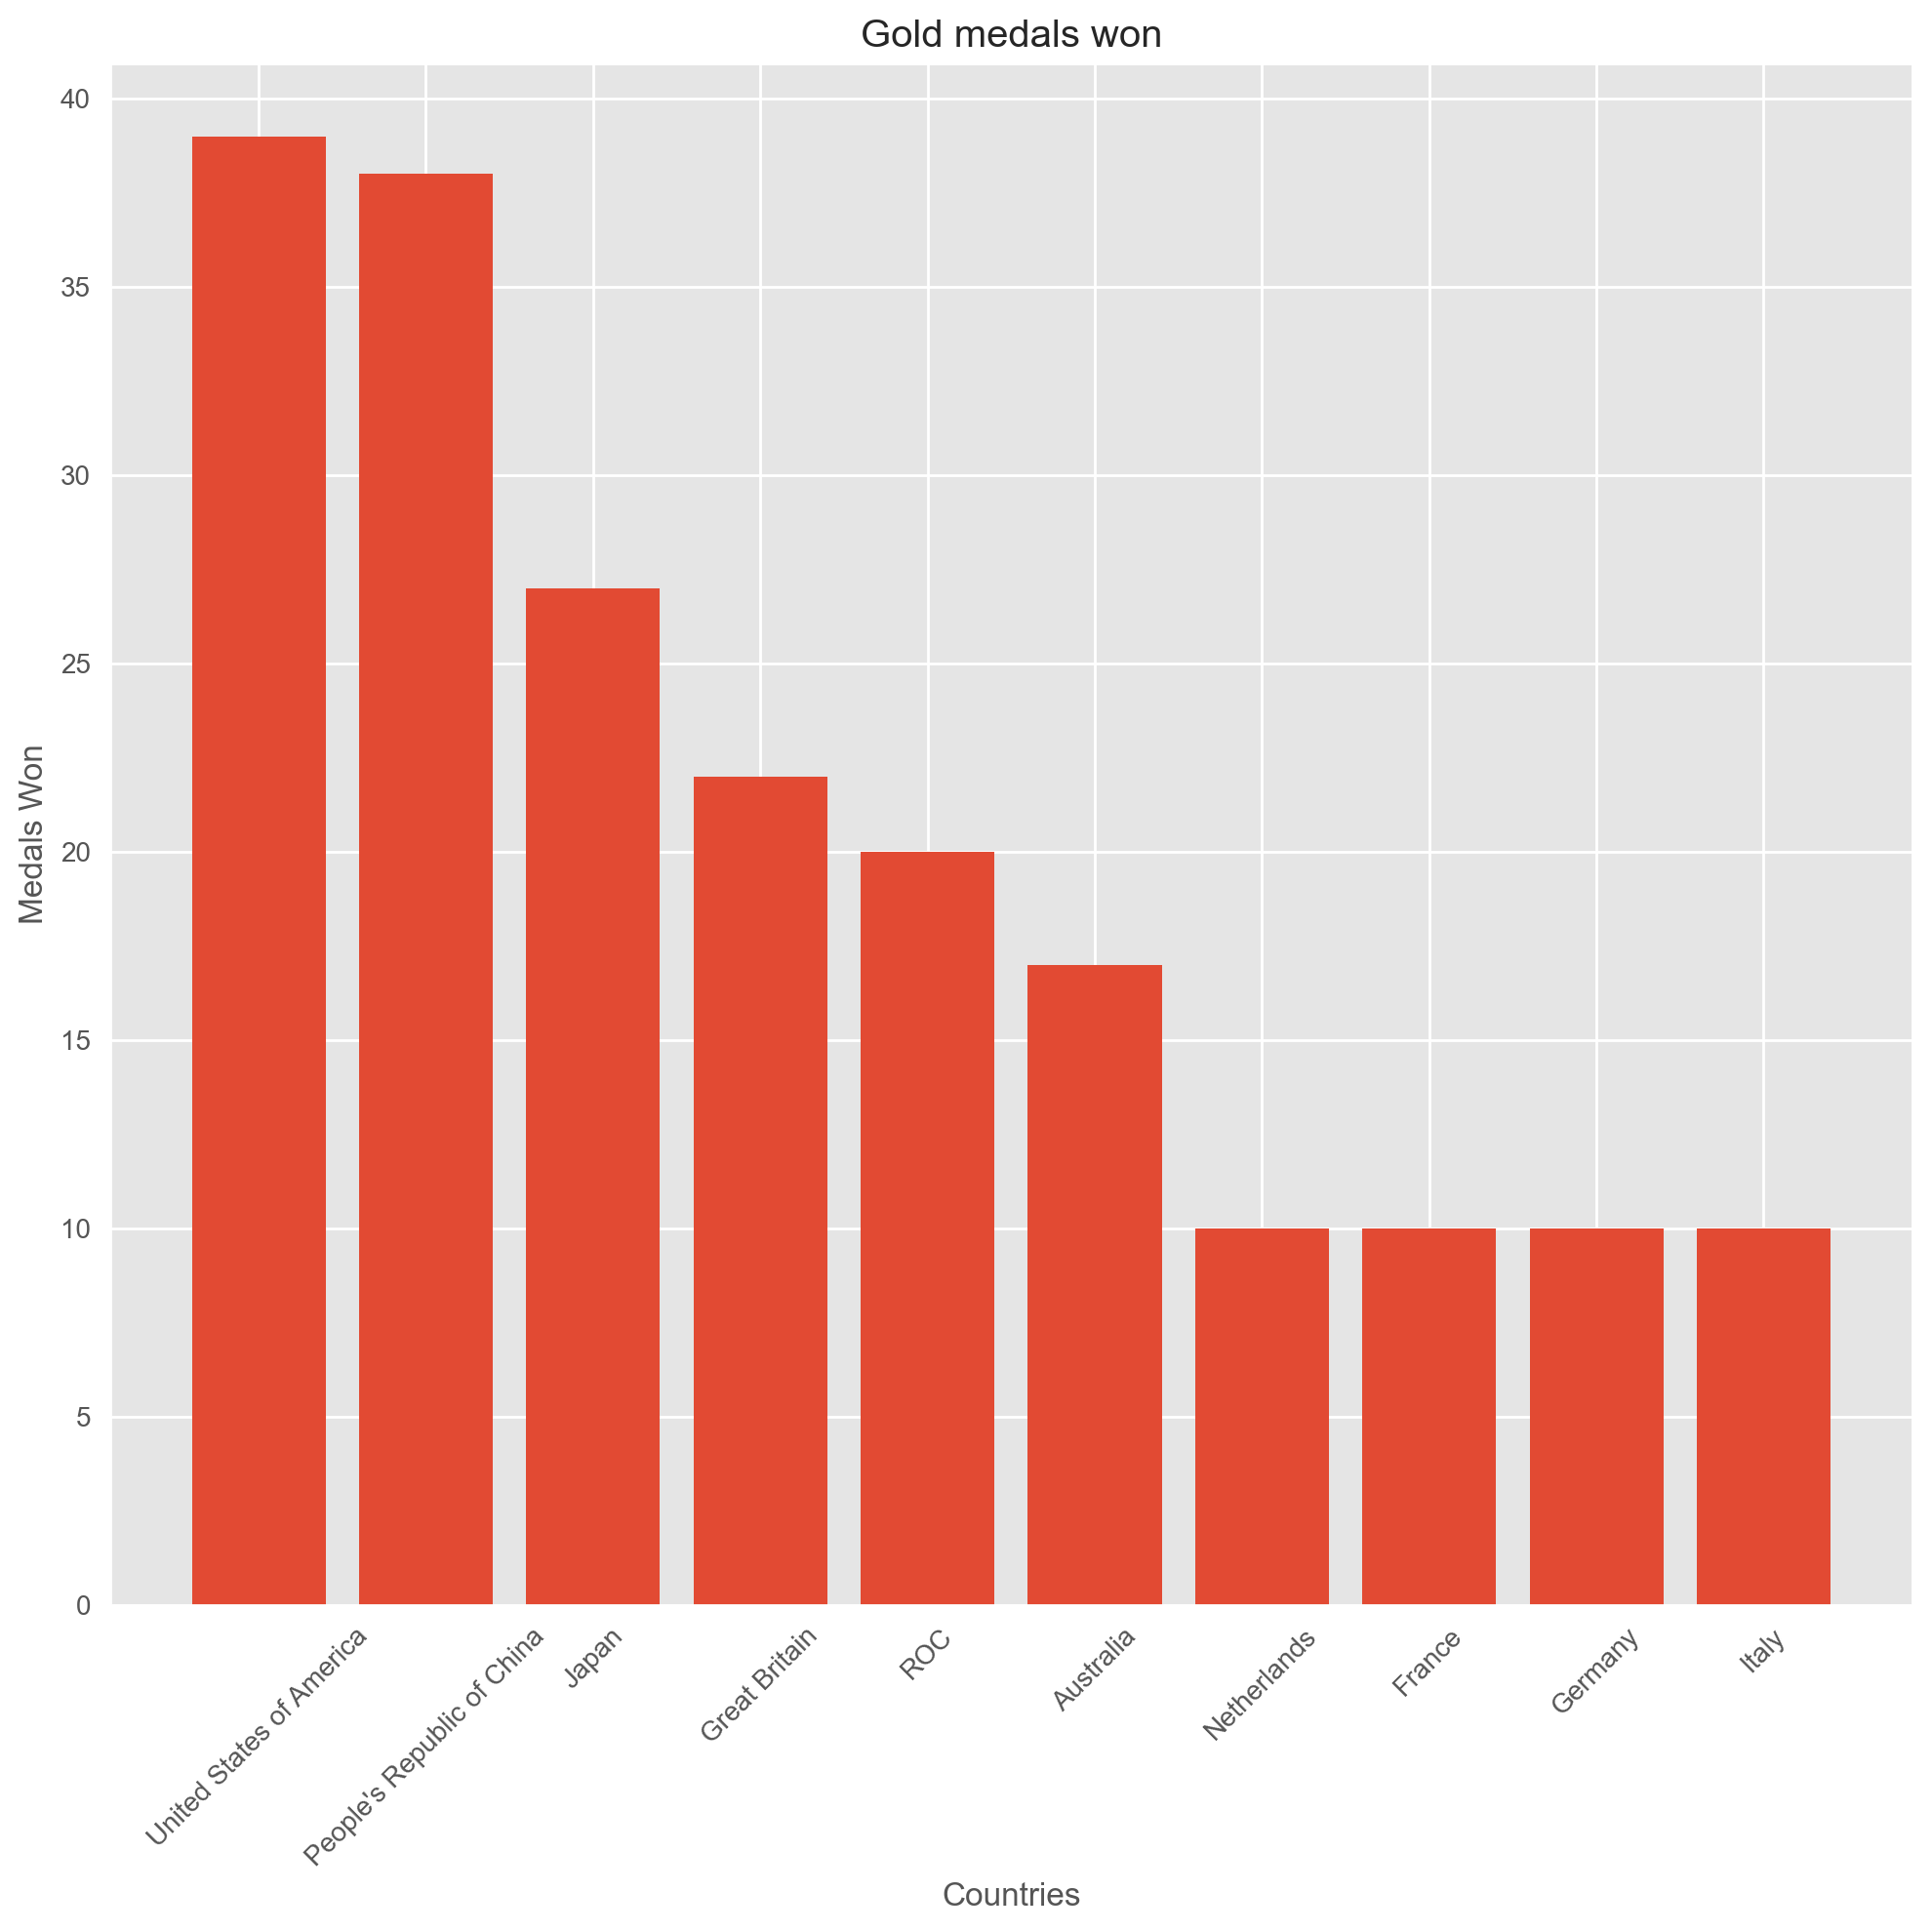

In [91]:
plt.style.use("ggplot")
plt.figure(figsize=(10,10),dpi=200)
names=medal.head(10).index
won=medal["Gold"].head(10)
plt.bar(np.arange(10),won)
plt.xticks(np.arange(10),names,rotation=45)
plt.xlabel("Countries")
plt.ylabel("Medals Won")
plt.title("Gold medals won")
plt.tight_layout()
plt.show()